In [ ]:
import os
import random

import cv2

noise_file_path = "./data/Train/Noised/"
denoise_file_path = "./data/Train/Denoised/"
noise_file_name = os.listdir(noise_file_path)
denoise_file_name = os.listdir(denoise_file_path)
noise_file_size_set = set()
denoise_file_size_set = set()
for name in noise_file_name:
    image = cv2.imread(noise_file_path+name)
    noise_file_size_set.add(image.shape)
for name in denoise_file_name:
    image = cv2.imread(denoise_file_path+name)
    denoise_file_size_set.add(image.shape)
print("noise_file_size_set",noise_file_size_set)
print("denoise_file_size_set",denoise_file_size_set)

In [ ]:
import shutil
import random
file_path = ""
file_new_path = ""
file_name = os.listdir(file_path)
file_name_1000 = random.choice(file_name)
for name in file_name_1000:
    shutil.copyfile(file_path+"Denoised/"+name,file_new_path+"Denoised/"+name)
    shutil.copyfile(file_path+"Noised/"+name,file_new_path+"Noised/"+name)

In [1]:
import image_dehazer


In [3]:
import os
import cv2
file_path = "./data/result/prenet_rain1600_psrnet6/"
result_list = os.listdir(file_path)

for name in result_list:
    HazeImg = cv2.imread(file_path+name)						# read input image -- **must be a color image**
    HazeCorrectedImg = image_dehazer.remove_haze(HazeImg)
    cv2.imwrite("data/result/prenet_rain1600_psrnet6_dehaze/"+name,HazeCorrectedImg)

# predict_file contrast histogram


Denoised_Inference_108.jpg


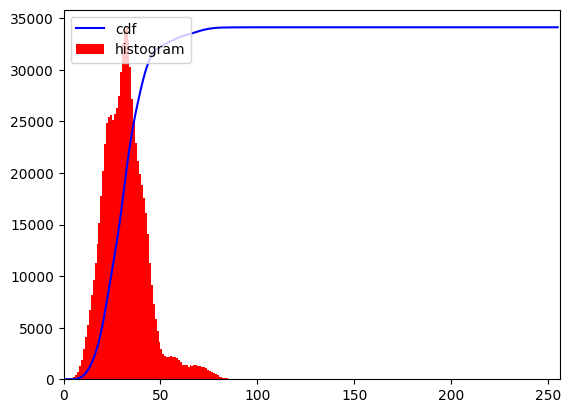

In [40]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[150])
img = img
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_10087.jpg
84.43171819051106


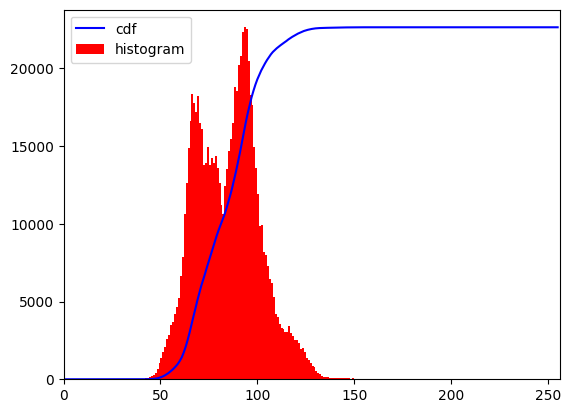

In [44]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/Denoised/"
file_name = os.listdir(file_path)
print(file_name[100])

img = cv2.imread(file_path + file_name[0])
img = img.flatten()
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [15]:
from math import log10, sqrt
import cv2
import numpy as np
import image_dehazer
from PIL import ImageFilter


def PSNR(original, compressed):
    original = cv2.imread(original)
    compressed = cv2.imread(compressed)
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def PSNR_dehaze(original, compressed):
    original = cv2.imread(original)
    compressed = cv2.imread(compressed)
    compressed = image_dehazer.remove_haze(compressed)
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def PSNR_filter(original, compressed):
    original = cv2.imread(original)
    compressed = cv2.imread(compressed)
    compressed = image_dehazer.remove_haze(compressed)
    compressed = compressed.filter(ImageFilter.BLUR)
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
def PSNR_image(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [16]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
gt_file_path = "data/Denoised/"
gt_file_name = os.listdir(gt_file_path)

predict_file_path = "data/result/prenet2000/"
predict_file_name = os.listdir(predict_file_path )
a_list = []
for name in predict_file_name:
    # if "Denoised_Inference" in name:
    #     continue
    gt_img = cv2.imread(gt_file_path + name)
    predict_img =cv2.imread(predict_file_path +name)
    a= PSNR_image(gt_img,predict_img)
    predict_img = predict_img.flatten()
    mean_predict_img = sum(predict_img) / len(predict_img)
    predict_img = [predict_img - (x/2) if x >= predict_img else predict_img + (x/2)  for x in predict_img]
    predict_img = np.reshape(predict_img,(512,512,3))
    print(predict_img.size)
    b= PSNR_image(gt_img,predict_img)
    a_list.append(b-a)


TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [12]:
sum(a_list)/len(a_list) #40

ZeroDivisionError: division by zero

In [44]:
sum(a_list)/len(a_list) #45

0.7861965307335911

In [42]:
sum(a_list)/len(a_list) #50

0.559492805714285

In [36]:
sum(a_list)/len(a_list) #32

0.3128600430462265

In [38]:
sum(a_list)/len(a_list) #90

-0.4693768391918725

In [72]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance
gt_file_path = "data/Denoised/"
gt_file_name = os.listdir(gt_file_path)

predict_file_path = "data/result/prenet2000/"
predict_file_name = os.listdir(predict_file_path )
a_list = []
for name in predict_file_name:
    if "Denoised_Inference" in name:
        continue
    gt_img = cv2.imread(gt_file_path + name)
    predict_img =cv2.imread(predict_file_path +name)
    a= PSNR_image(gt_img,predict_img)
    predict_img =Image.open(predict_file_path +name)
    predict_img = ImageEnhance.Contrast(predict_img).enhance(1.5)
    predict_img = np.array(predict_img.getdata()).reshape(predict_img.size[0], predict_img.size[1], 3)
    b= PSNR_image(gt_img,predict_img)
    a_list.append(b-a)


In [73]:
a_list

[-15.021866743093096,
 -6.60680082139876,
 -11.866464359981094,
 -13.065274824315193,
 -9.907084170036558,
 -12.503375991173757,
 -15.515882436763802,
 -13.533319695465604,
 -5.387054856497635,
 -5.857061255112157,
 -12.522395409502657,
 -15.090340821981362,
 -14.251699939259993,
 -5.771866575550483,
 -16.725194257639025,
 -11.801447052932415,
 -11.085319234325048,
 -5.319169565231025,
 -8.529672329407994,
 -3.852798216773717,
 -12.442128083917488,
 -9.362919832225128,
 -14.213961788776153,
 -5.93984889420625,
 -2.7238651059641157,
 -6.53396449008482,
 -13.663963041739606,
 -14.281694115731721,
 -7.054781858754566,
 -13.064139442850234,
 -5.939195629779562,
 -6.549740091623043,
 -11.968414957877766,
 -12.304649796723895,
 -14.360421533931177,
 -12.335328458890423,
 -5.776357345732386,
 -6.185310313638674,
 -6.816122276353244,
 -6.674461160982034,
 -13.692771584634857,
 -14.182719608538259,
 -13.837816962835088,
 -16.20861030966359,
 -13.851299988965232,
 -12.023820144992577,
 -14.76537

### RGB

Denoised_Inference_108.jpg
35.43194580078125


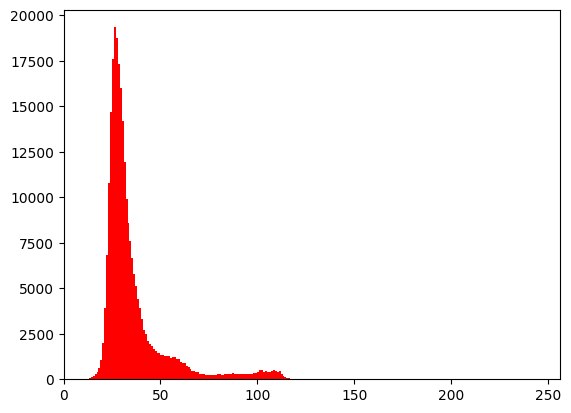

In [48]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:,:,1]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
38.4925651550293


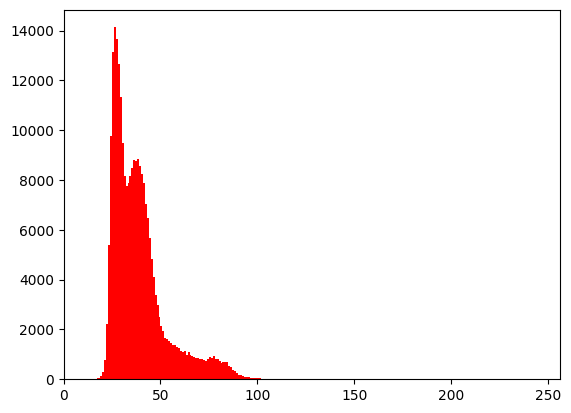

In [49]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:,:,0]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
28.617442162129166


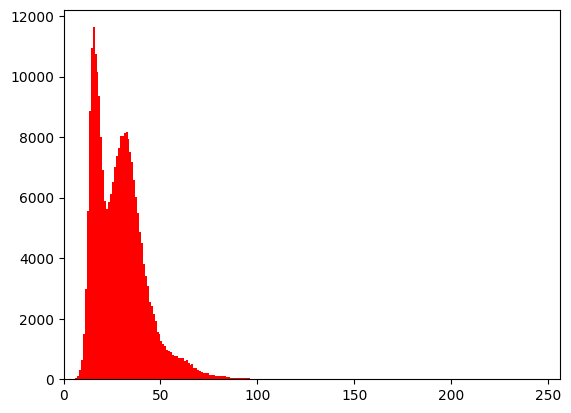

In [50]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:,:,1]  = 0
img[:,:,0]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_0.jpg
84.20291519165039


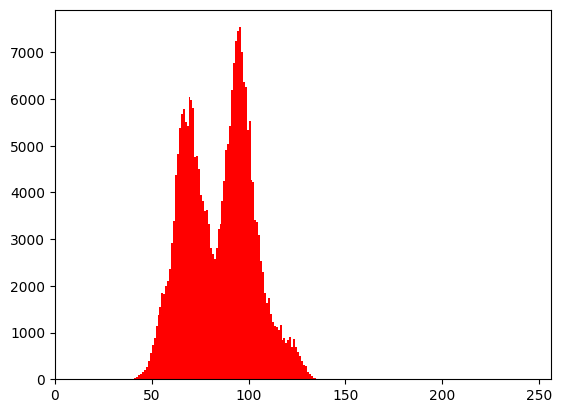

In [18]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/Denoised/"
file_name = os.listdir(file_path)
print(file_name[0])

img = cv2.imread(file_path + file_name[0])
img[:,:,1]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_0.jpg
84.8723373413086


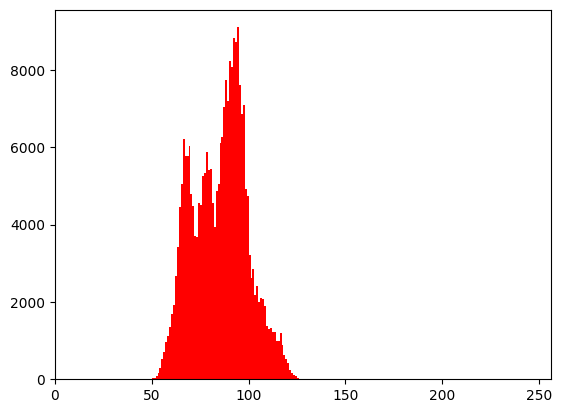

In [19]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/Denoised/"
file_name = os.listdir(file_path)
print(file_name[0])

img = cv2.imread(file_path + file_name[0])
img[:,:,0]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_0.jpg
84.21990203857422


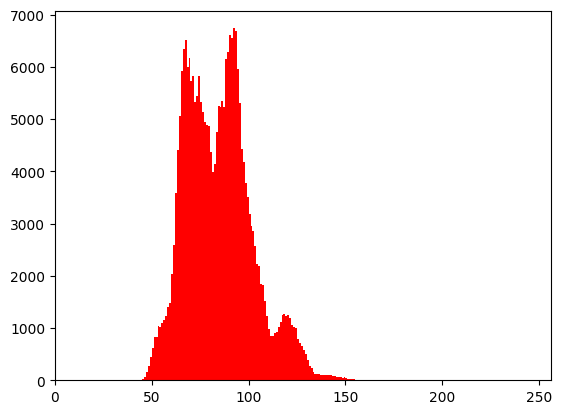

In [20]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/Denoised/"
file_name = os.listdir(file_path)
print(file_name[0])

img = cv2.imread(file_path + file_name[0])
img[:,:,1]  = 0
img[:,:,0]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### sk

Denoised_Inference_108.jpg
85.63044408162922


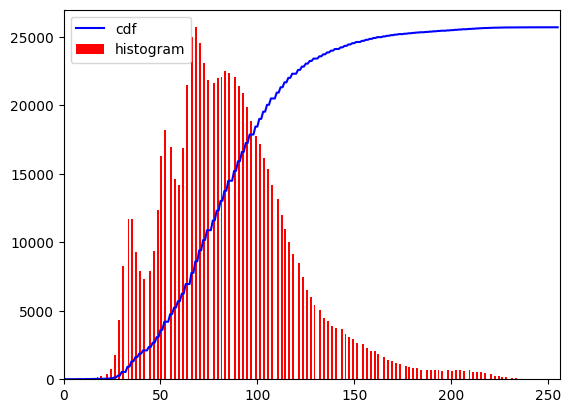

In [61]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0]) *2.2
img = img.flatten()
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
34.17948659261068


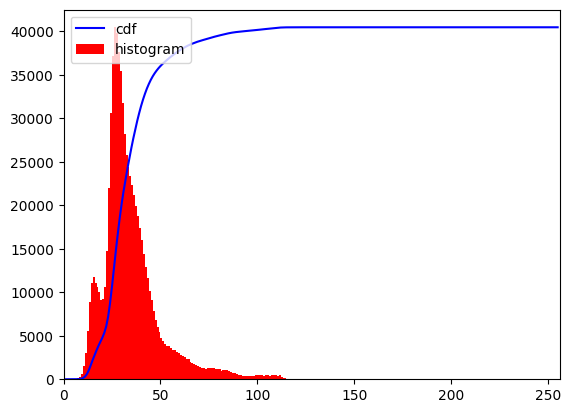

In [43]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img = img.flatten()
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [58]:
import cv2
file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)

for name in file_name:
    predict_img = cv2.imread(file_path+name)
    a = "data/result/prenet3000_shift2/"
    predict_img[:,:,0] = predict_img[:,:,0] + 40
    predict_img[:,:,1] = predict_img[:,:,1] + 45
    predict_img[:,:,2] = predict_img[:,:,2] + 51
    cv2.imwrite(a+name,predict_img)

Denoised_Inference_108.jpg
43.6937141418457


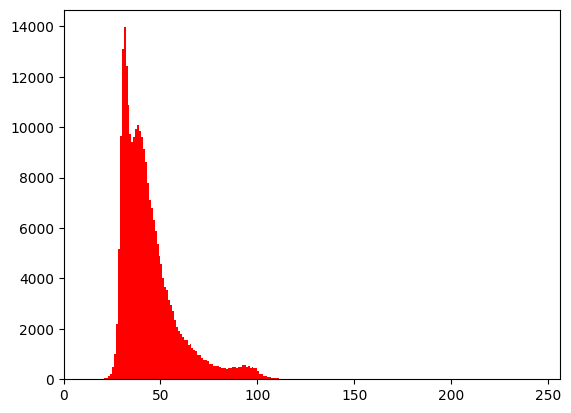

In [53]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:,:,1]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
39.86622568598055


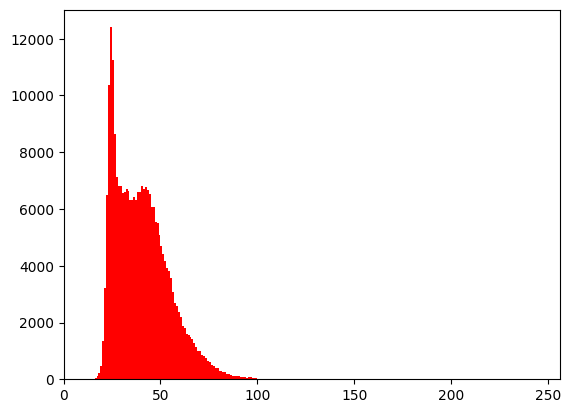

In [54]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:,:,0]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
33.220404954703994


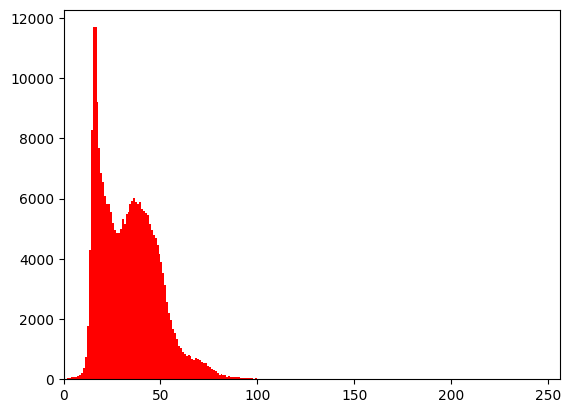

In [55]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:,:,1]  = 0
img[:,:,0]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [56]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
gt_file_path = "data/Denoised/"
gt_file_name = os.listdir(gt_file_path)

predict_file_path = "data/result/prenet3000/"
predict_file_name = os.listdir(predict_file_path)
a_list = []
for name in predict_file_name:
    if "Denoised_Inference" in name:
        continue
    gt_img = cv2.imread(gt_file_path + name)
    predict_img =cv2.imread(predict_file_path +name)
    a= PSNR_image(gt_img,predict_img)
    predict_img[:,:,0] = predict_img[:,:,0] + 40
    predict_img[:,:,1] = predict_img[:,:,1] + 45
    predict_img[:,:,2] = predict_img[:,:,2] + 51
    b= PSNR_image(gt_img,predict_img)
    a_list.append(b-a)


In [57]:
a_list

[]

In [ ]:
import os
import random

import cv2

noise_file_path = "./data/Train/Noised/"
denoise_file_path = "./data/Train/Denoised/"
noise_file_name = os.listdir(noise_file_path)
denoise_file_name = os.listdir(denoise_file_path)
noise_file_size_set = set()
denoise_file_size_set = set()
for name in noise_file_name:
    image = cv2.imread(noise_file_path + name)
    noise_file_size_set.add(image.shape)
for name in denoise_file_name:
    image = cv2.imread(denoise_file_path + name)
    denoise_file_size_set.add(image.shape)
print("noise_file_size_set", noise_file_size_set)
print("denoise_file_size_set", denoise_file_size_set)
import shutil
import random

file_path = ""
file_new_path = ""
file_name = os.listdir(file_path)
file_name_1000 = random.choice(file_name)
for name in file_name_1000:
    shutil.copyfile(file_path + "Denoised/" + name, file_new_path + "Denoised/" + name)
    shutil.copyfile(file_path + "Noised/" + name, file_new_path + "Noised/" + name)
import image_dehazer

import os
import cv2

file_path = "./data/result/prenet_rain1600_psrnet6/"
result_list = os.listdir(file_path)

for name in result_list:
    HazeImg = cv2.imread(file_path + name)  # read input image -- **must be a color image**
    HazeCorrectedImg = image_dehazer.remove_haze(HazeImg)
    cv2.imwrite("data/result/prenet_rain1600_psrnet6_dehaze/" + name, HazeCorrectedImg)
# predict_file contrast histogram

import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[150])
img = img
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/Denoised/"
file_name = os.listdir(file_path)
print(file_name[100])

img = cv2.imread(file_path + file_name[0])
img = img.flatten()
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()
from math import log10, sqrt
import cv2
import numpy as np
import image_dehazer
from PIL import ImageFilter


def PSNR(original, compressed):
    original = cv2.imread(original)
    compressed = cv2.imread(compressed)
    mse = np.mean((original - compressed) ** 2)
    if (mse == 0):  # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


def PSNR_dehaze(original, compressed):
    original = cv2.imread(original)
    compressed = cv2.imread(compressed)
    compressed = image_dehazer.remove_haze(compressed)
    mse = np.mean((original - compressed) ** 2)
    if (mse == 0):  # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


def PSNR_filter(original, compressed):
    original = cv2.imread(original)
    compressed = cv2.imread(compressed)
    compressed = image_dehazer.remove_haze(compressed)
    compressed = compressed.filter(ImageFilter.BLUR)
    mse = np.mean((original - compressed) ** 2)
    if (mse == 0):  # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


def PSNR_image(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if (mse == 0):  # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

gt_file_path = "data/Denoised/"
gt_file_name = os.listdir(gt_file_path)

predict_file_path = "data/result/prenet2000/"
predict_file_name = os.listdir(predict_file_path)
a_list = []
for name in predict_file_name:
    if "Denoised_Inference" in name:
        continue
    gt_img = cv2.imread(gt_file_path + name)
    predict_img = cv2.imread(predict_file_path + name)
    a = PSNR_image(gt_img, predict_img)
    predict_img[:, :, 0] = predict_img[:, :, 0] + 45
    predict_img[:, :, 1] = predict_img[:, :, 1] + 38
    predict_img[:, :, 2] = predict_img[:, :, 2] + 48
    b = PSNR_image(gt_img, predict_img)
    a_list.append(b - a)

sum(a_list) / len(a_list)  #40
sum(a_list) / len(a_list)  #45
sum(a_list) / len(a_list)  #50
sum(a_list) / len(a_list)  #32
sum(a_list) / len(a_list)  #90
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance

gt_file_path = "data/Denoised/"
gt_file_name = os.listdir(gt_file_path)

predict_file_path = "data/result/prenet2000/"
predict_file_name = os.listdir(predict_file_path)
a_list = []
for name in predict_file_name:
    if "Denoised_Inference" in name:
        continue
    gt_img = cv2.imread(gt_file_path + name)
    predict_img = cv2.imread(predict_file_path + name)
    a = PSNR_image(gt_img, predict_img)
    predict_img = Image.open(predict_file_path + name)
    predict_img = ImageEnhance.Contrast(predict_img).enhance(1.5)
    predict_img = np.array(predict_img.getdata()).reshape(predict_img.size[0], predict_img.size[1], 3)
    b = PSNR_image(gt_img, predict_img)
    a_list.append(b - a)

a_list
### RGB
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:, :, 1] = 0
img[:, :, 2] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:, :, 0] = 0
img[:, :, 2] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:, :, 1] = 0
img[:, :, 0] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/Denoised/"
file_name = os.listdir(file_path)
print(file_name[0])

img = cv2.imread(file_path + file_name[0])
img[:, :, 1] = 0
img[:, :, 2] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/Denoised/"
file_name = os.listdir(file_path)
print(file_name[0])

img = cv2.imread(file_path + file_name[0])
img[:, :, 0] = 0
img[:, :, 2] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/Denoised/"
file_name = os.listdir(file_path)
print(file_name[0])

img = cv2.imread(file_path + file_name[0])
img[:, :, 1] = 0
img[:, :, 0] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
### sk
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0]) * 2.2
img = img.flatten()
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet400/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img = img.flatten()
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()
import cv2

file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)

for name in file_name:
    predict_img = cv2.imread(file_path + name)
    a = "data/result/prenet3000_shift2/"
    predict_img[:, :, 0] = predict_img[:, :, 0] + 40
    predict_img[:, :, 1] = predict_img[:, :, 1] + 45
    predict_img[:, :, 2] = predict_img[:, :, 2] + 51
    cv2.imwrite(a + name, predict_img)

import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:, :, 1] = 0
img[:, :, 2] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:, :, 0] = 0
img[:, :, 2] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

file_path = "data/result/prenet3000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:, :, 1] = 0
img[:, :, 0] = 0
img = img.flatten()
img = img[img != 0]
print(sum(img) / len(img))
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

gt_file_path = "data/Denoised/"
gt_file_name = os.listdir(gt_file_path)

predict_file_path = "data/result/prenet3000/"
predict_file_name = os.listdir(predict_file_path)
a_list = []
for name in predict_file_name:
    if "Denoised_Inference" in name:
        continue
    gt_img = cv2.imread(gt_file_path + name)
    predict_img = cv2.imread(predict_file_path + name)
    a = PSNR_image(gt_img, predict_img)
    predict_img[:, :, 0] = predict_img[:, :, 0] + 40
    predict_img[:, :, 1] = predict_img[:, :, 1] + 45
    predict_img[:, :, 2] = predict_img[:, :, 2] + 51
    b = PSNR_image(gt_img, predict_img)
    a_list.append(b - a)

a_list


Denoised_Inference_108.jpg
74.13290405273438


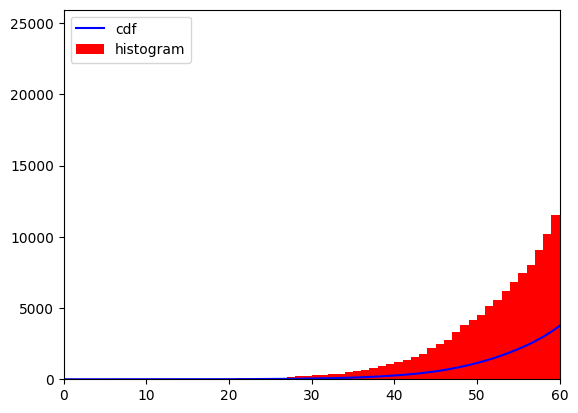

In [63]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/cut_blur/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[])
img = img.flatten()
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,60])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
58.30940246582031


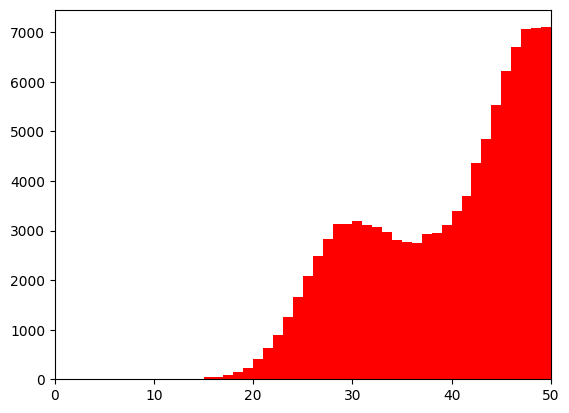

In [84]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/cut_blur/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[12])
img[:,:,1]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,50])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

68.82080078125


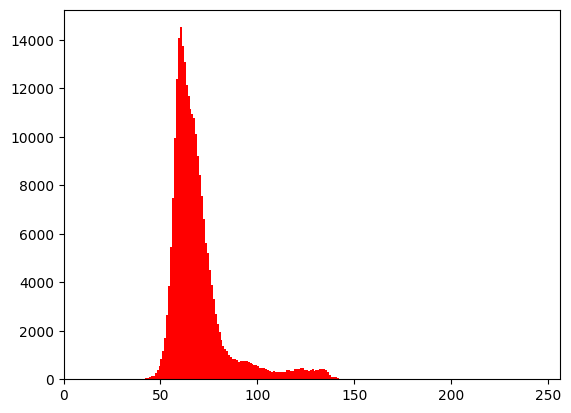

In [4]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/ensemble/"
file_name = os.listdir(file_path)
# print(file_name[0])

img = cv2.imread(file_path + file_name[0])
img[:,:,1]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
66.29515838623047


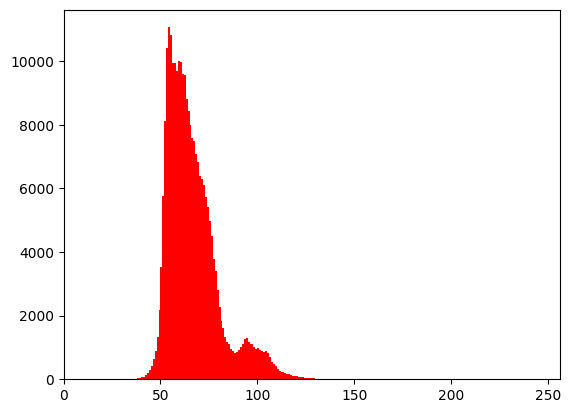

In [5]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/ensemble/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:,:,0]  = 0
img[:,:,2]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
61.308319091796875


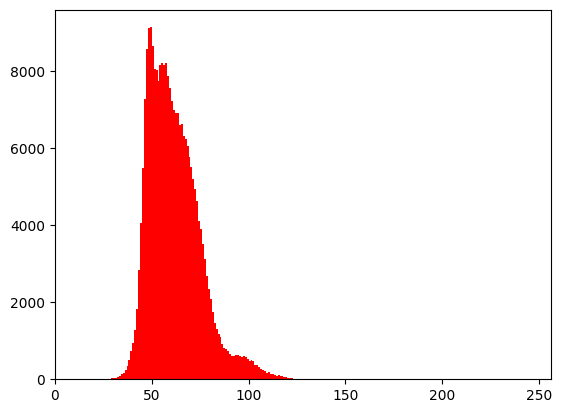

In [7]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/ensemble/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
img[:,:,1]  = 0
img[:,:,0]  = 0
img = img.flatten()
img = img[img!=0]
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg
[[0.49609375 0.35351562 0.4765625 ]
 [0.33398438 0.21679688 0.3359375 ]
 [0.44335938 0.4453125  0.01757812]
 ...
 [0.22070312 0.23242188 0.14257812]
 [0.109375   0.35351562 0.3359375 ]
 [0.16210938 0.00390625 0.40625   ]]


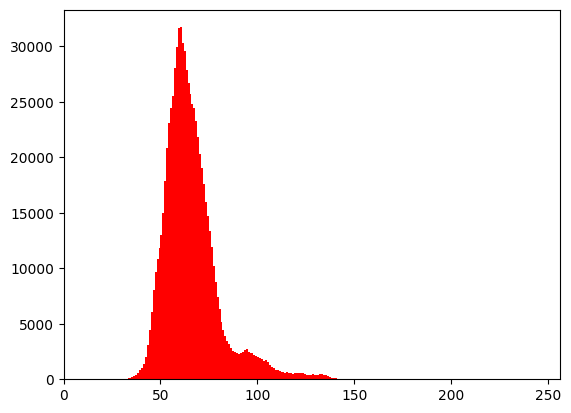

In [17]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/ensemble/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg


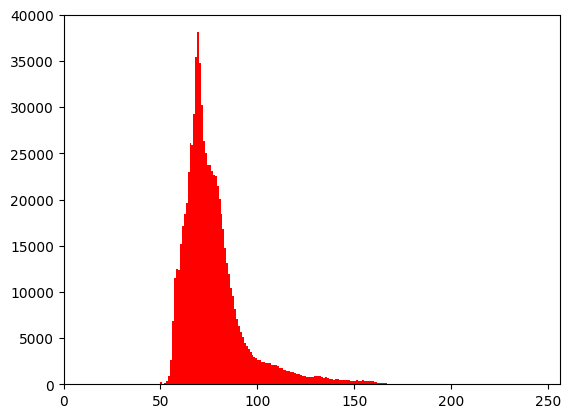

In [25]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/prenet2000/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
a = sum(img.flatten())/len(img.flatten())
img = img + 450*3/a
# print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_108.jpg


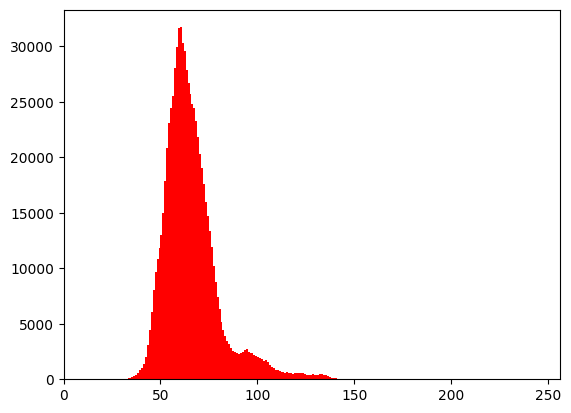

In [19]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
file_path = "data/result/ensemble/"
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[0])
a = sum(img.flatten())/len(img.flatten())

# print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Denoised_Inference_134.jpg
53.456400553385414


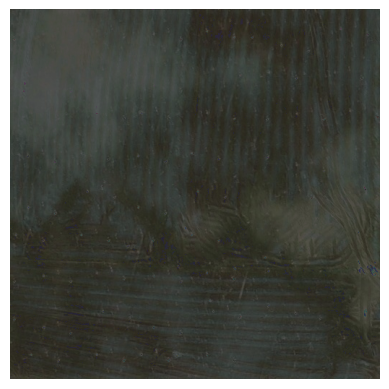

In [180]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
file_path = "data/result/ensemble/"
file_name = os.listdir(file_path)
print(file_name[39])

img = cv2.imread(file_path + file_name[39])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.flatten()
average_value = sum(img)/len(img)
img = np.array([5+int(average_value * 0.5) + x if 0<x < 12 + 0.3 * average_value else x for x in img])
img = np.array([x-50 if 0.3* average_value+70  < x < 255 else x for x in img])
img = img.reshape(512,512,3)
img[:,:,1][(img[:,:,1] >10 )&(img[:,:,1] < 75 )] += 3
print(average_value)
# print(sum(img)/len(img))
# hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
# plt.hist(img.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
# plt.show()
plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(img)
plt.show()
# plt.imshow(img)

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
file_path = "data/result/ensemble/"
file_name = os.listdir(file_path)
print(file_name[392])

img = cv2.imread(file_path + file_name[1])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.flatten()
average_value = sum(img)/len(img)
img = np.array([5+int(average_value * 0.5) + x if 0<x < 12 + 0.3 * average_value else x for x in img])
img = np.array([x-35 if 0.5 * average_value+70  < x < 255 else x for x in img])
img = img.reshape(512,512,3)
img[:,:,1][(img[:,:,1] >10 )&(img[:,:,1] < 75 )] += 5
print(average_value)
# print(sum(img)/len(img))
# hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
# plt.hist(img.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
# plt.show()
plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(img)
plt.show()
# plt.imshow(img)
file_name = os.listdir(file_path)
print(file_name[10])

img = cv2.imread(file_path + file_name[102])
a = sum(img.flatten())/len(img.flatten())
print(a)
# print(sum(img)/len(img))
hist,bins = np.histogram(img.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [181]:
import os
import cv2
file_path = "data/result/ensemble/"
result_list = os.listdir(file_path)

for name in result_list:
    img = cv2.imread(file_path+name)
    img = img.flatten()
    average_value = sum(img)/len(img)
    img = np.array([5+int(average_value * 0.5) + x if 0<x < 12 + 0.3 * average_value else x for x in img])
    img = np.array([x-35 if 0.3* average_value+70  < x < 255 else x for x in img])
    img = img.reshape(512,512,3)
    img[:,:,1][(img[:,:,1] >10 )&(img[:,:,1] < 75 )] += 3# read input image -- **must be a color image**
    cv2.imwrite("data/result/final/"+name,img)

KeyboardInterrupt: 

In [182]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
file_path = "data/result/ensemble/"
file_name = os.listdir(file_path)
print(file_name[392])
a = []

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for name in file_name:
    img = cv2.imread(file_path + name)
    img = img.flatten()
    average_value = sum(img)/len(img)
    a.append(average_value)
print(a)

Denoised_Inference_92.jpg
[65.47475941975911, 60.593892415364586, 59.73343276977539, 63.10904312133789, 70.23095575968425, 68.05637486775716, 66.97539138793945, 58.32894770304362, 62.663561503092446, 70.34930801391602, 53.92352549235026, 67.55871836344402, 61.811597188313804, 57.52171834309896, 66.35374450683594, 58.48637898763021, 64.2327486673991, 59.30552419026693, 57.328722635904946, 57.158074696858726, 56.17225901285807, 57.01030349731445, 66.62443669637044, 58.6500612894694, 46.52577209472656, 51.77798843383789, 68.23888397216797, 63.68073654174805, 52.869805653889976, 65.29540252685547, 61.903692881266274, 59.07216135660807, 62.33369445800781, 69.0647964477539, 51.72309239705404, 67.57647323608398, 61.18122990926107, 64.3637809753418, 58.09300867716471, 53.456400553385414, 62.7576649983724, 64.64991505940755, 57.251364390055336, 57.155783335367836, 42.14856084187826, 63.785943349202476, 60.958353678385414, 53.58490880330404, 61.61082077026367, 60.00576655069987, 53.7760429382324